In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [18]:
file_path = "HR-Employee-Attrition-All.CSV"


df = pd.read_csv(file_path)

In [20]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [22]:
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100

In [24]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [26]:
print(df['Attrition'].unique())

['Yes' 'No']


In [28]:
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100

print(attrition_rate)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [34]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [40]:
print(df['Attrition'].unique())

['Yes' 'No']


In [46]:
attrition_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100

print(attrition_by_dept)

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


In [52]:
attrition_by_role = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100

print(attrition_by_role)

Attrition                         No        Yes
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036


In [58]:
age_analysis = df.groupby('Attrition')['Age'].mean()

print(age_analysis)

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


In [64]:
income_analysis = df.groupby('Attrition')['MonthlyIncome'].mean()

print(income_analysis)

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64


In [68]:
overtime_analysis = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack() * 100

print(overtime_analysis)

Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


In [70]:
work_life_balance_analysis = df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack() * 100

print(work_life_balance_analysis)

Attrition               No        Yes
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


In [72]:
job_satisfaction_analysis = df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack() * 100

print(job_satisfaction_analysis)

Attrition               No        Yes
JobSatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [100]:
df_model = df.copy()

print(df_model.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [102]:
print(df_model['OverTime'].unique())

print(df_model['Attrition'].unique())

['Yes' 'No']
['Yes' 'No']


In [104]:
df_model['OverTime'] = df_model['OverTime'].str.strip().str.title()
df_model['Attrition'] = df_model['Attrition'].str.strip().str.title()

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


df_model['OverTime'] = le.fit_transform(df_model['OverTime'])
df_model['Attrition'] = le.fit_transform(df_model['Attrition'])




In [112]:
print(df_model[['OverTime', 'Attrition']].head())

   OverTime  Attrition
0         1          1
1         0          0
2         1          1
3         1          0
4         0          0


In [116]:
y = df_model['Attrition']

In [118]:
X = df_model[['Age', 'MonthlyIncome', 'OverTime', 'WorkLifeBalance', 'JobSatisfaction']]

In [120]:
print(X.head())

print(y.head())

   Age  MonthlyIncome  OverTime  WorkLifeBalance  JobSatisfaction
0   41           5993         1                1                4
1   49           5130         0                3                2
2   37           2090         1                3                3
3   33           2909         1                3                3
4   27           3468         0                3                2
0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64


In [134]:

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
print(X_train.shape, y_train.shape)

(1176, 5) (1176,)


In [140]:
print(X_train.dtypes)

print(y_train.dtypes)

Age                int64
MonthlyIncome      int64
OverTime           int64
WorkLifeBalance    int64
JobSatisfaction    int64
dtype: object
int64


In [146]:
print(X_train.isnull().sum())

print(y_train.isnull().sum())

Age                0
MonthlyIncome      0
OverTime           0
WorkLifeBalance    0
JobSatisfaction    0
dtype: int64
0


In [154]:
print(type(X_train), type(X_test))

print(X_train.shape, X_test.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(1176, 5) (294, 5)


In [156]:
print(X_train.dtypes)

Age                int64
MonthlyIncome      int64
OverTime           int64
WorkLifeBalance    int64
JobSatisfaction    int64
dtype: object


In [166]:
from sklearn.preprocessing import StandardScaler


In [198]:
scaler = StandardScaler()

In [200]:
print(X_train.dtypes)

print(X_test.dtypes)

Age                int64
MonthlyIncome      int64
OverTime           int64
WorkLifeBalance    int64
JobSatisfaction    int64
dtype: object
Age                int64
MonthlyIncome      int64
OverTime           int64
WorkLifeBalance    int64
JobSatisfaction    int64
dtype: object


In [202]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd. to_numeric, errors='coerce')

In [204]:
print(X_train.isnull().sum())

print(y_train.isnull().sum())

Age                0
MonthlyIncome      0
OverTime           0
WorkLifeBalance    0
JobSatisfaction    0
dtype: int64
0


In [206]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [228]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [230]:
import pandas as pd

In [232]:
X_train = pd.DataFrame(X_train, columns=['Age', 'MonthlyIncome', 'OverTime', 'WorkLifeBalance', 'JobSatisfaction'])
X_test = pd.DataFrame(X_test, columns=['Age', 'MonthlyIncome', 'OverTime', 'WorkLifeBalance', 'JobSatisfaction'])

In [234]:
print(model)

LogisticRegression()


In [236]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [238]:
y_pred = model.predict(X_test)

print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


In [242]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [248]:
features = X_train.columns

In [250]:
features = ['Age', 'MonthlyIncome', 'OverTime', 'WorkLifeBalance', 'JobSatisfaction']

In [254]:
print(hasattr(model, 'coef_'))

True


In [256]:
print(model.coef_.shape)

(1, 5)


In [258]:
feature_importance = pd.Series(model.coef_[0], index=features)

print(feature_importance)

Age               -0.306709
MonthlyIncome     -0.453713
OverTime           0.722129
WorkLifeBalance   -0.183781
JobSatisfaction   -0.350818
dtype: float64


In [27]:
import pandas as pd

In [35]:
file_path = "HR-Employee-Attrition-All.CSV"


df = pd.read_csv(file_path)  

In [37]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [73]:
attrition_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100

In [41]:
print(attrition_by_dept)

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


In [45]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns

In [53]:
import matplotlib.pyplot as plt

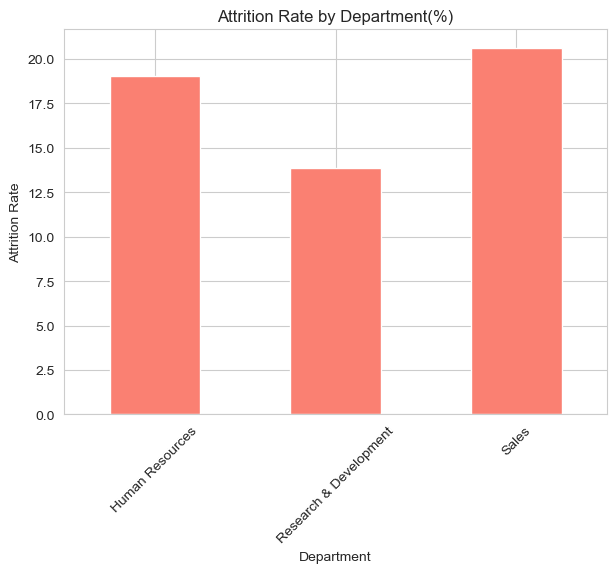

In [61]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(7,5))
attrition_by_dept['Yes'].plot(kind='bar', color='salmon', ax=ax)

plt.title('Attrition Rate by Department(%)')
plt.ylabel('Attrition Rate')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

In [75]:
attrition_by_overtime = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack() * 100

In [77]:
print(attrition_by_overtime)

Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


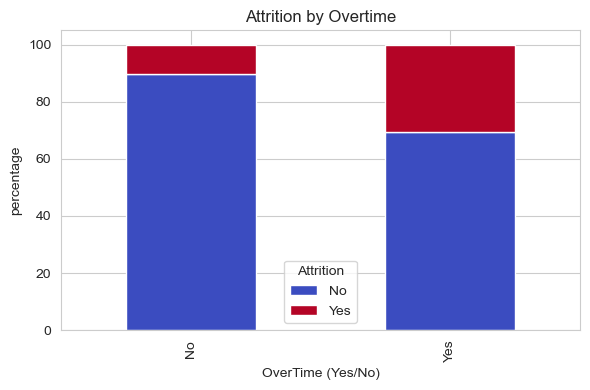

In [85]:
fig, ax = plt.subplots(figsize=(6,4))
attrition_by_overtime.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax)

ax.set_title('Attrition by Overtime')
ax.set_ylabel('percentage')
ax.set_xlabel('OverTime (Yes/No)')
plt.legend(title='Attrition', loc='best')
plt.tight_layout()
plt.show()                       

In [89]:
attrition_by_work_life_balance = df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack() * 100

In [91]:
print(attrition_by_work_life_balance)

Attrition               No        Yes
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


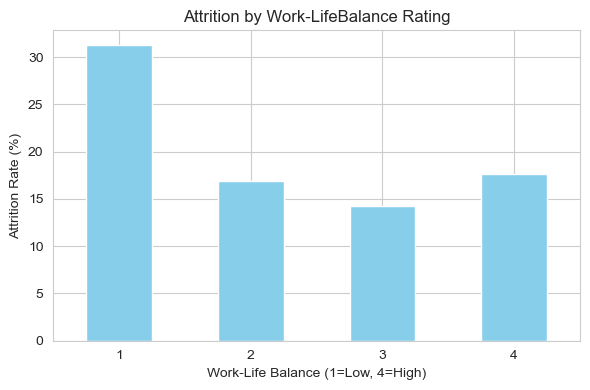

In [306]:
fig, ax = plt.subplots(figsize=(6,4))
attrition_by_work_life_balance['Yes'].plot(kind='bar', color='skyblue', ax=ax)

ax.set_title('Attrition by Work-LifeBalance Rating')
ax.set_ylabel('Attrition Rate (%)')
ax.set_xlabel('Work-Life Balance (1=Low, 4=High)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()                       

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [106]:
file_path = "HR-Employee-Attrition-All.CSV"


df = pd.read_csv(file_path)  

In [108]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

In [110]:
features = ['Age', 'DailyRate', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
X = df[features]
y = df['Attrition']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [126]:
feature_importance = pd.Series(model.coef_[0], index=features)

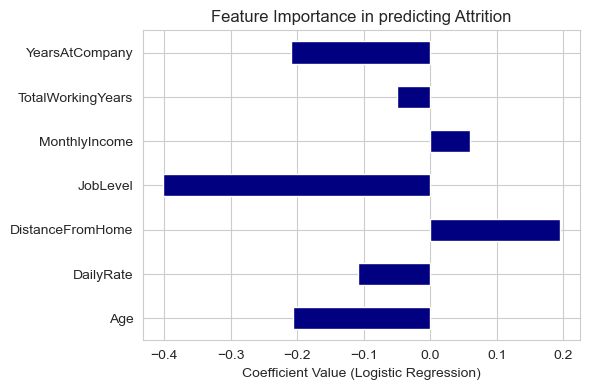

In [130]:
fig, ax = plt.subplots(figsize=(6,4))
feature_importance.plot(kind='barh', color='navy', ax=ax)

ax.set_title('Feature Importance in predicting Attrition')
ax.set_xlabel('Coefficient Value (Logistic Regression)')
plt.tight_layout()
plt.show()                       

In [136]:
import numpy as np

In [138]:
numeric_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'WorkLifeBalance', 'JobSatisfaction']
corr_matrix = df[numeric_cols].corr()

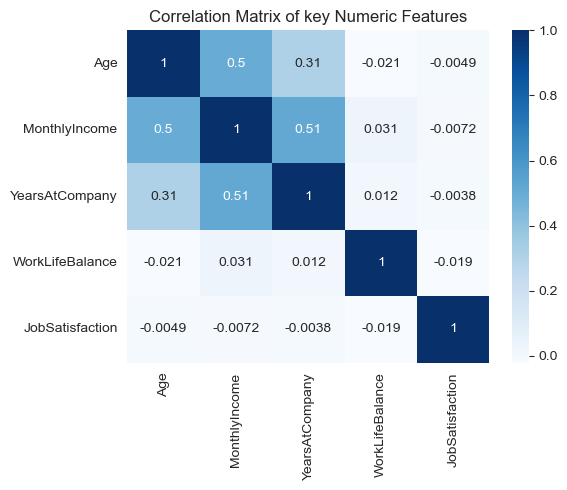

In [142]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', ax=ax)
ax.set_title('Correlation Matrix of key Numeric Features')
plt.tight_layout()
plt.show()

In [196]:
import matplotlib.pyplot as plt

import seaborn as sns

In [286]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(7,5))
attrition_by_dept['Yes'].plot(kind='bar', color='salmon', ax=ax)

plt.title('Attrition Rate by Department(%)')
plt.ylabel('Attrition Rate')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

In [290]:
plt.draw()
plt.savefig('attrition_by_department.png', dpi=300, bbox_inches='tight')
plt.show()



In [292]:
import os 

print(f'File saved: {os.path.exists(file_path)}')

File saved: True


In [318]:
import matplotlib


In [320]:
matplotlib.use('MacOSX')

In [322]:
plt.close('all')

In [324]:
matplotlib.use('MacOSX')

In [326]:
import matplotlib.pyplot as plt
plt.ion()

In [268]:
import matplotlib.pyplot as plt

import seaborn as sns

In [332]:
fig, ax = plt.subplots(figsize=(6,4))
attrition_by_overtime.plot(kind='bar', stacked=True, colormap='coolwarm', ax=ax)

ax.set_title('Attrition by Overtime')
ax.set_ylabel('percentage')
ax.set_xlabel('OverTime (Yes/No)')
plt.legend(title='Attrition', loc='best')
plt.tight_layout()
plt.show()                       

In [334]:
plt.draw()
plt.savefig('attrition_by_overtime.png', dpi=300, bbox_inches='tight')
plt.show()

In [336]:
import os 

print(f'File saved: {os.path.exists(file_path)}')

File saved: True


In [340]:
fig, ax = plt.subplots(figsize=(6,4))
attrition_by_work_life_balance['Yes'].plot(kind='bar', color='skyblue', ax=ax)

ax.set_title('Attrition by Work-LifeBalance Rating')
ax.set_ylabel('Attrition Rate (%)')
ax.set_xlabel('Work-Life Balance (1=Low, 4=High)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()                       

In [342]:
plt.draw()
plt.savefig('attrition_by_worklifebalance.png', dpi=300, bbox_inches='tight')
plt.show()

In [344]:
import os 

print(f'File saved: {os.path.exists(file_path)}')

File saved: True


In [358]:
fig, ax = plt.subplots(figsize=(6,4))
feature_importance.plot(kind='barh', color='navy', ax=ax)

ax.set_title('Feature Importance in predicting Attrition')
ax.set_xlabel('Coefficient Value (Logistic Regression)')
plt.tight_layout()
plt.show()                       

In [360]:
plt.draw()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [362]:
import os 

print(f'File saved: {os.path.exists(file_path)}')

File saved: True


In [364]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', ax=ax)
ax.set_title('Correlation Matrix of key Numeric Features')
plt.tight_layout()
plt.show()

In [366]:
plt.draw()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [368]:
import os 

print(f'File saved: {os.path.exists(file_path)}')

File saved: True
